In [1]:
from psutil import *

In [2]:
cpu_count()

72

In [3]:
!lscpu |grep 'Model name'

Model name:                      Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz


In [4]:
!lscpu | grep 'Socket(s):'

Socket(s):                       2


In [5]:
!lscpu | grep 'Core(s) per socket:'

Core(s) per socket:              18


In [6]:
cpu_stats()

scpustats(ctx_switches=1170934358461, interrupts=75972749483, soft_interrupts=72038545421, syscalls=0)

In [8]:
!pip3 install pyldavis
!pip3 install gensim==4.1.2
!pip3 install lda2vec
!pip install --upgrade numpy
!pip install yellowbrick 
!pip install --upgrade ipykernel
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
ERROR: Cannot uninstall numpy 1.19.5, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.19.5'.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/bigdata-01QYD/s270005/.local/lib/python3.7/site-packages/numpy-1.19.5.dist-info/METADATA'

Defaulting to user installation because normal site-packages is not writeable
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-package

In [9]:
!pip install --force-reinstall --no-deps numpy==1.19.5

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
ERROR: Cannot uninstall numpy 1.19.5, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.19.5'.


In [19]:
import glob
import unicodedata
import re
import csv
import pickle 
from datetime import datetime

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import words

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
import yellowbrick
from yellowbrick.text import FreqDistVisualizer

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "/opt/anaconda3/envs/bigdatalab_cpu_202101/bin/python"
  * The NumPy version is: "1.19.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: libopenblasp-r0-09e95953.3.13.so: cannot open shared object file: No such file or directory


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
import gensim
#from gensim.models.wrappers import DtmModel
#from gensim.models.wrappers import LdaMallet
from gensim.models import TfidfModel
from gensim.models import LsiModel
from gensim.models.nmf import Nmf
from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaMulticore
from gensim.models.ldamodel import LdaModel

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

In [ ]:
Origin=True
name="HDFS"
#name="Spark"
method="MESSAGE"

In [ ]:
print("LOAD DATA")
if Origin:
    print("\tCONSIDER ORIGIN")
    filename = f"/home/bigdata-01QYD/s270005/Tesi/Final/LSI/{name}_InputData_{method}.txt"
else:
    print("\tNOT CONSIDER ORIGIN")
    filename = f"{name}_InputData_Message.txt"
print(f"READ FILE: {filename}")
data=[]
with open(filename, 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter='\t')
    for i,row in enumerate(rows):
        tmp = row[0].replace("[", "")
        tmp = tmp.replace("]", "")
        tmp = tmp.replace("'", "")
        row_l = list(tmp.split(", "))
        if i<30:
            print(i, row_l)
        data.append(row_l)
print("END LOAD DATA")

In [ ]:
MAX_TOPIC=len(data)
print(MAX_TOPIC)

In [ ]:
id2word=corpora.Dictionary(data)
corpus=[id2word.doc2bow(word) for word in data]
print(len(corpus), len(id2word))

In [ ]:
%%time
print("NMF - LSA")
topics_nmf_lsa=list(np.arange(10, MAX_TOPIC+1, 1)) #STEP DI 5 PER WS
print(f"TOPICS: {topics_nmf_lsa}")

In [ ]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
list(corpus_tfidf[:2])

In [ ]:
%%time

print("LSA")
best_coherence=0
best_k=0
df_log=pd.DataFrame(columns=["seed","k","coherence"])
idx=0
for seed in range(0,100):
    print("-"*60)
    print(seed)
    best_coherence=0
    best_k=0
    for k in topics_nmf_lsa:
        np.random.seed(seed)
        lsa_model=LsiModel(corpus=corpus, id2word=id2word, num_topics=k,decay=1.5) 
        cm = CoherenceModel(model=lsa_model, dictionary=id2word, texts=data, coherence='c_v')#, window_size=w) #110
        coherence = cm.get_coherence() 
        if coherence>best_coherence:
                best_coherence=coherence
                best_k=k
                print(f"\t--> [BEST]: {int(k):02}     -     {round(coherence,5)}") #[0,1]')
        else:
                print(f"\t{int(k):02}     -     {round(coherence,5)}") #[0,1]')
        df_log.loc[idx]=[seed,k,coherence]
        idx+=1
#df_log.to_csv(f"/home/bigdata-01QYD/s270005/Tesi/Final/LSI/{name}_LSI_{method}.csv", index=False)

In [30]:
best_k=14
seed=57

In [31]:
np.random.seed(seed)
best_model=LsiModel(corpus=corpus, id2word=id2word, num_topics=best_k) 
cm = CoherenceModel(model=best_model, dictionary=id2word, texts=data, coherence='c_v')#, window_size=w) #110
coherence = cm.get_coherence() 
print(coherence)

0.767387757236911


## TEST LSI

In [ ]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]
print(texts)
# remove words that appear only once
#frequency = defaultdict(int)
#for text in texts:
#    for token in text:
#        frequency[token] += 1

#texts = [
#    [token for token in text if frequency[token] > 1]
#    for text in texts
#]
#print(texts)

#dictionary = corpora.Dictionary(texts)
#corpus = [dictionary.doc2bow(text) for text in texts]

id2word=corpora.Dictionary(texts)
corpus=[id2word.doc2bow(word) for word in texts]
print(len(corpus), len(id2word))
#print(dictionary)

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model


In [ ]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

In [ ]:
for doc in corpus:
    print(doc)

In [ ]:
for k in range(2,10):
    np.random.seed(0)
    lsi_model = models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=k)  # initialize an LSI transformation
    #corpus_lsi = lsi_model[corpus_tfidf]
    cm = CoherenceModel(model=lsi_model, dictionary=id2word, texts=texts, coherence='c_v')#, window_size=w) #110
    coherence = cm.get_coherence()
    print(coherence)

In [ ]:
lsi_model.print_topics(2)

In [ ]:
cm = CoherenceModel(model=lsi_model, dictionary=id2word, texts=texts, coherence='c_v')#, window_size=w) #110
coherence = cm.get_coherence()
print(coherence)

67
['#56ae57', '#fff917', '#3a18b1', '#758000', '#a87dc2', '#76ff7b', '#419c03', '#0804f9', '#86775f', '#c0fa8b', '#c9643b', '#fa5ff7', '#069af3', '#c1f80a', '#96f97b']
20 (0, [('task', -0.37262638025069605), ('mapred', -0.23695579442557033), ('configuration', -0.2252173454361262), ('deprecate use mapreduce', -0.22521734543612612), ('mapreduce', -0.2252173454361261), ('deprecate use', -0.2252173454361261), ('configuration deprecation', -0.22521734543612607), ('use mapreduce', -0.22521734543612607), ('use', -0.225217345436126), ('deprecation', -0.22521734543612595), ('configuration deprecation mapred', -0.22521734543612595), ('deprecate', -0.22521734543612593), ('deprecation mapred', -0.2252173454361259), ('use mapreduce task', -0.1933949888003797), ('mapreduce task', -0.19339498880037967), ('deprecation mapred task', -0.15332477628144026), ('mapred task', -0.15332477628144026), ('partition', -0.10645615940358379), ('task partition', -0.1051094285569792), ('task ismap', -0.1050413038088

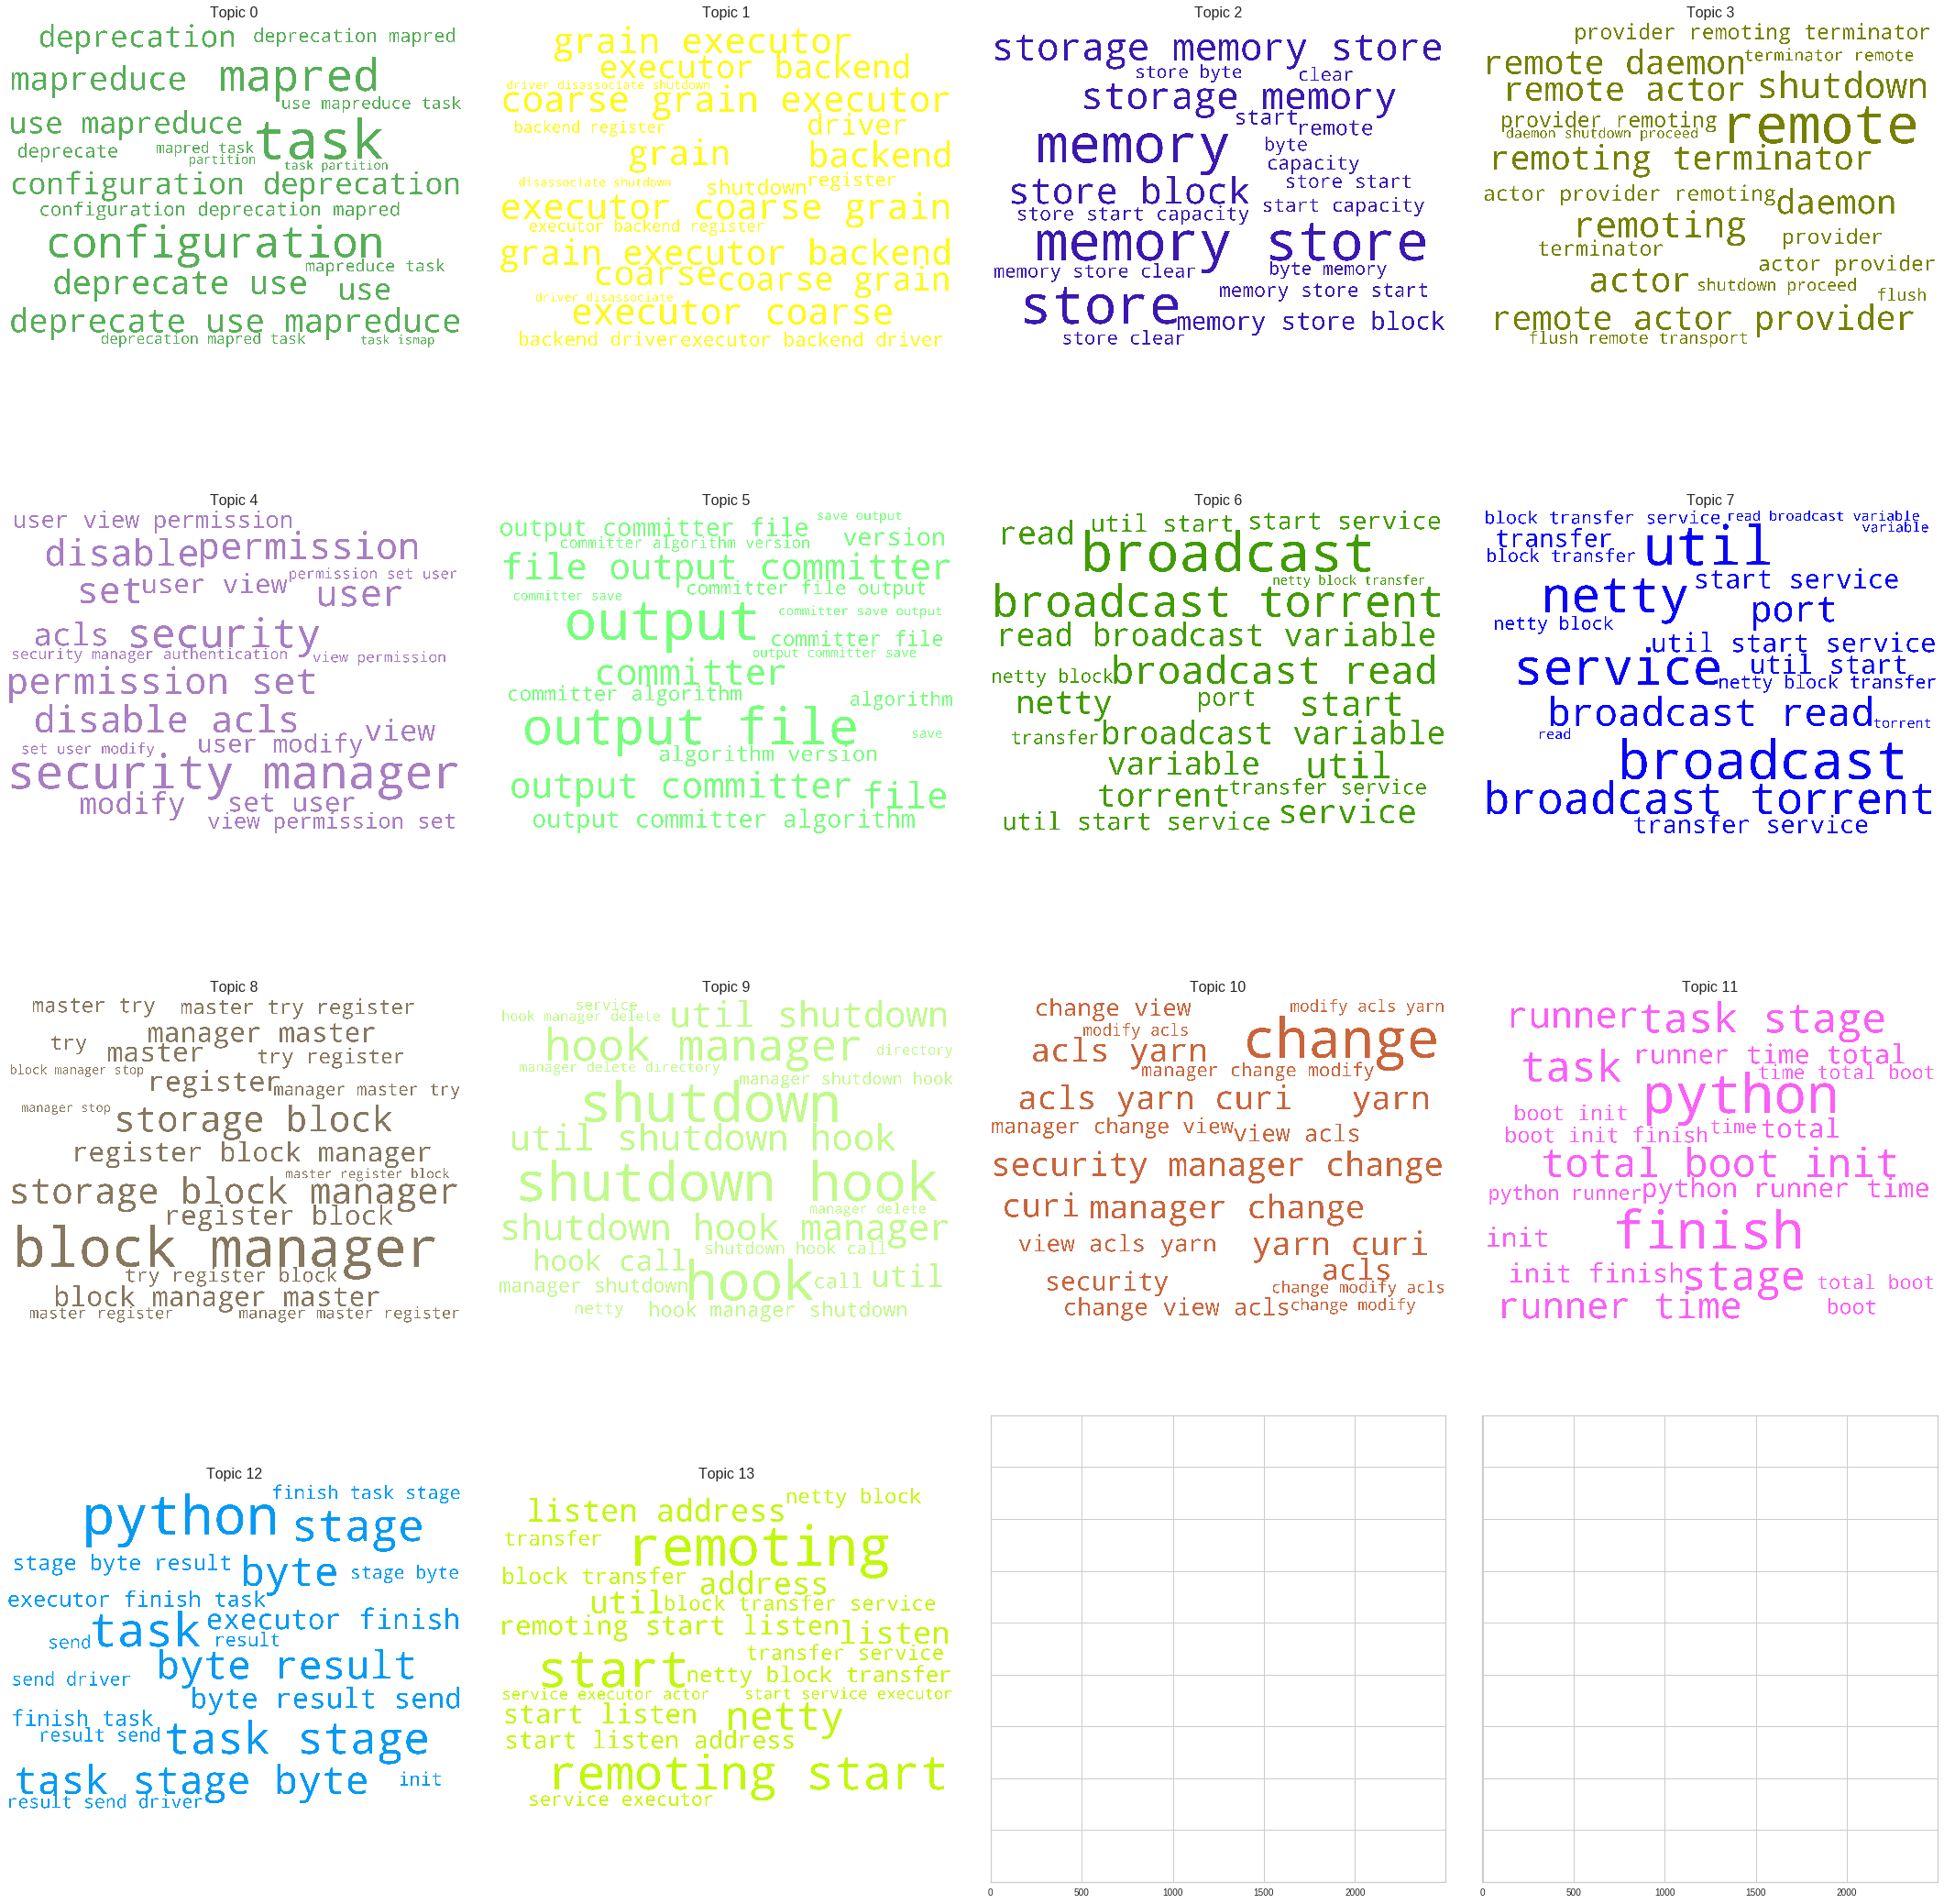

In [36]:
##################### WORDCLOUDS #######################

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
offset=int(len(tmp)/best_k)
print(offset)
cols=tmp[1::offset]
print(cols)

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = best_model.show_topics(num_topics=best_k,num_words=20,formatted=False)
for i,el in enumerate(topics):
    print(len(el[1]),el)

plotx=np.floor(np.sqrt(best_k))
ploty=plotx
flag=True
while plotx*ploty < best_k:
    if flag:
        ploty+=1
        flag=False
    else:
        plotx+=1
print(plotx,ploty)
    
fig, axes = plt.subplots(int(plotx), int(ploty), figsize=(30,30), sharex=True, sharey=True)
axes=axes.flatten()
topics_words=[]
j=0
for i in range(best_k):
    #print(i)
    fig.add_subplot(axes[i])
    tmp = dict(topics[i][1])
    print(tmp)
    topic_words={}
    for k,v in tmp.items():
        if v<0:
            topic_words[k]=-v
        else:
            topic_words[k]=v
    print(topic_words)
    print("\n")
    
    topics_words.append(list(topic_words.keys()))
    #print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(f'Topic {j+i}', fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=15, hspace=15)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig(f"LSI_{name}_k={best_k}_seed={seed}_WC.png")
plt.show()


In [37]:
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import gensim.downloader as api
import gensim.downloader
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import export_graphviz
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import graphviz

In [38]:
w2v=[]
for tw in topics_words:
    tmp=[]
    for el in tw:
        splits=el.split(" ")
        tmp.append("_".join(splits))
    print(tmp)
    w2v.append(tmp)

['task', 'mapred', 'configuration', 'deprecate_use_mapreduce', 'mapreduce', 'deprecate_use', 'configuration_deprecation', 'use_mapreduce', 'use', 'deprecation', 'configuration_deprecation_mapred', 'deprecate', 'deprecation_mapred', 'use_mapreduce_task', 'mapreduce_task', 'deprecation_mapred_task', 'mapred_task', 'partition', 'task_partition', 'task_ismap']
['coarse_grain_executor', 'executor_coarse', 'executor_coarse_grain', 'grain_executor', 'grain_executor_backend', 'grain', 'coarse', 'backend', 'executor_backend', 'coarse_grain', 'driver', 'shutdown', 'backend_driver', 'executor_backend_driver', 'register', 'executor_backend_register', 'backend_register', 'driver_disassociate_shutdown', 'disassociate_shutdown', 'driver_disassociate']
['memory_store', 'store', 'memory', 'storage_memory_store', 'storage_memory', 'store_block', 'memory_store_block', 'start', 'remote', 'memory_store_start', 'capacity', 'store_start_capacity', 'store_start', 'start_capacity', 'clear', 'memory_store_clear

In [39]:
model_g= api.load('word2vec-google-news-300')

In [40]:
counter=0
tot=0
unique_word=set()
for el in w2v:
    for w in el:
        tot+=1
        unique_word.add(w)
        '''
        try:
            vec = model_g[w]
        except KeyError:
            print(f"The word <{w}> does not appear in this model")
            counter+=1
        '''
print(tot)
for w in unique_word:
    try:
        vec = model_g[w]
    except KeyError:
        print(f"The word <{w}> does not appear in this model")
        counter+=1
print(counter, len(unique_word))

280
The word <set_user_modify> does not appear in this model
The word <permission_set> does not appear in this model
The word <byte_result_send> does not appear in this model
The word <executor_backend_register> does not appear in this model
The word <output_committer> does not appear in this model
The word <total_boot> does not appear in this model
The word <committer_algorithm> does not appear in this model
The word <driver_disassociate_shutdown> does not appear in this model
The word <task_stage_byte> does not appear in this model
The word <committer_save> does not appear in this model
The word <byte_memory> does not appear in this model
The word <block_manager_stop> does not appear in this model
The word <start_listen> does not appear in this model
The word <memory_store_start> does not appear in this model
The word <task_partition> does not appear in this model
The word <util_shutdown_hook> does not appear in this model
The word <memory_store_block> does not appear in this model
T

In [41]:
model = Word2Vec(min_count=1, vector_size=300)
model.build_vocab(w2v)
model.wv.vectors_lockf = np.ones(len(model.wv))
training_examples_count = model.corpus_count
# below line will make it 1, so saving it before
model.build_vocab([list(model_g.key_to_index)], update=True)
model.wv.vectors_lockf = np.ones(len(model.wv))
model.wv.intersect_word2vec_format("GoogleNews-vectors-negative300.bin",binary=True)
model.train(w2v, total_examples=training_examples_count, epochs=model.epochs)


(1159, 1400)

In [42]:
#CLUSTER COMPARISON
tp=w2v
similarities=[]
for i,top_wrd in enumerate(tp):
    print(f"{i+1} - {top_wrd}")
    tmp=tp
    tmp_sim=[]
    for j,other_topic in enumerate(tmp):
        #print(f"\t{j+1} - {other_topic}")
        similarity=model.wv.n_similarity(top_wrd,other_topic)
        #print(f"\t\tSimilarity: {similarity}")
        tmp_sim.append(similarity)
    similarities.append(tmp_sim)
print(similarities)

1 - ['task', 'mapred', 'configuration', 'deprecate_use_mapreduce', 'mapreduce', 'deprecate_use', 'configuration_deprecation', 'use_mapreduce', 'use', 'deprecation', 'configuration_deprecation_mapred', 'deprecate', 'deprecation_mapred', 'use_mapreduce_task', 'mapreduce_task', 'deprecation_mapred_task', 'mapred_task', 'partition', 'task_partition', 'task_ismap']
2 - ['coarse_grain_executor', 'executor_coarse', 'executor_coarse_grain', 'grain_executor', 'grain_executor_backend', 'grain', 'coarse', 'backend', 'executor_backend', 'coarse_grain', 'driver', 'shutdown', 'backend_driver', 'executor_backend_driver', 'register', 'executor_backend_register', 'backend_register', 'driver_disassociate_shutdown', 'disassociate_shutdown', 'driver_disassociate']
3 - ['memory_store', 'store', 'memory', 'storage_memory_store', 'storage_memory', 'store_block', 'memory_store_block', 'start', 'remote', 'memory_store_start', 'capacity', 'store_start_capacity', 'store_start', 'start_capacity', 'clear', 'memory

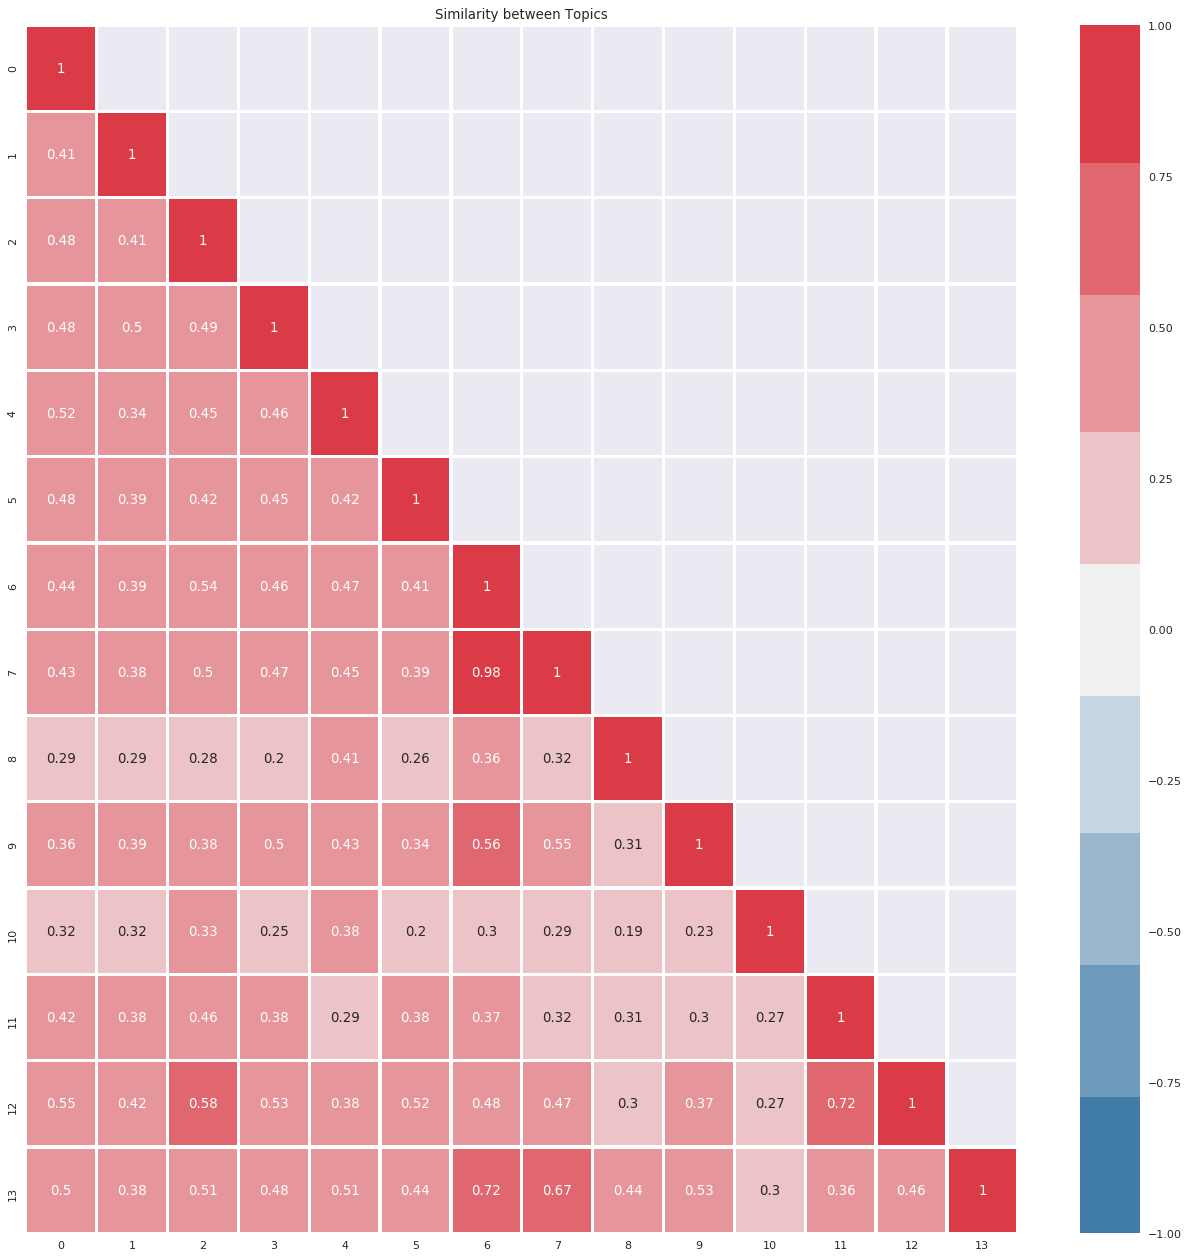

In [44]:
with sns.axes_style("darkgrid"):
    mask = np.triu(np.ones_like(similarities, dtype=bool),k=1)
    plt.figure(figsize=(20,20), dpi=80)
    cmap=sns.diverging_palette(240, 10, n=9)
    sns.heatmap(similarities,annot=True,mask=mask,
              cmap=cmap,
              linewidth=2,edgecolor="k",
              #square=True
              vmin=-1,vmax=1,center=0
              )
    plt.title("Similarity between Topics")
    plt.savefig(f"LSI_{name}_k={best_k}_seed={seed}_SM.png")
    plt.show()

In [ ]:
similarities=pd.DataFrame(similarities)
upper_tri = similarities.where(np.triu(np.ones(similarities.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
similarities_dropped=similarities.drop(columns=to_drop)
print("Features to be dropped:\n", to_drop)


In [ ]:
################## WORD COUNT AND IMPORTANCE ##########################

from collections import Counter
topics = best_lda_model.show_topics(num_topics=23,formatted=False)
data_flat = [w for w_list in input_data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 5, figsize=(30,30), sharey=True, dpi=160)
tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
offset=int(len(tmp)/23)
print(offset)
cols=tmp[1::offset]
print(cols)

axes=axes.flatten()
for i in range(23):
    ax=axes[i]
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left')
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
###################### SENTENCE TOPIC DOMINANCE ###############################
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_lda_model, corpus=corpus, texts=input_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.to_csv("Spark Results")
df_dominant_topic

In [ ]:
##################### SENTENCE CHART TOPIC COLOR ######################################
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=best_lda_model, corpus=corpus, start = 0, end = 39):
    corp = corpus[start:end]
    tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    offset=int(len(tmp)/23)
    print(offset)
    mycolors=tmp[1::offset]
    print(cols)

    fig, axes = plt.subplots(end-start, 1, figsize=(30, (end-start)*0.95), dpi=150)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        ax.axis("off")
        if i > 0:
            corp_cur = corp[i-1] 
            #print(corp_cur)
            topic_percs = lda_model[corp_cur]
            #print(topic_percs)
            #wordid_topics = 
            word_dominanttopic=[]
            for id,f in corp_cur:
                w=lda_model.id2word[id]
                t=lda_model.get_term_topics(id)
                #print(w,f,t)
                #print("\n")
                if len(t)>0:
                    word_dominanttopic.append((w,t[0][0]))
            #print(lda_model.get_document_topics(corp_cur))
            #word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.3, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    mul=len(word)
                    if len(word)>15:
                        mul=mul/1.1
                    word_pos += .005 * mul  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.99, x=0.5, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [ ]:
print(best_lda_model.get_term_topics("ciao"))

In [ ]:
############################### T-SNE  ###################################
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(best_lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

In [ ]:
import logging
from gensim import interfaces
from gensim.topic_coherence import (segmentation, probability_estimation, direct_confirmation_measure, indirect_confirmation_measure, aggregation)
from gensim.matutils import argsort
from gensim.utils import is_corpus, FakeDict
from gensim.models.ldamodel import LdaModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
import numpy as np
from collections import namedtuple

In [ ]:
logger = logging.getLogger(__name__)
boolean_document_based = ['u_mass']
sliding_window_based = ['c_v', 'c_uci', 'c_npmi']
make_pipeline = namedtuple('Coherence_Measure', 'seg, prob, conf, aggr')

coherence_dict = {
    'c_v': make_pipeline(segmentation.s_one_set,
                         probability_estimation.p_boolean_sliding_window,
                         indirect_confirmation_measure.cosine_similarity,
                         aggregation.arithmetic_mean),
}

sliding_windows_dict = {
    'c_v': 110,
    'c_uci': 10,
    'c_npmi': 10
}

In [ ]:
class MyCoherenceModel(interfaces.TransformationABC):

    def __init__(self, model=None, topics=None, texts=None, corpus=None, dictionary=None, window_size=None, coherence='c_v', topn=10):

        if model is None and topics is None:
            raise ValueError("One of model or topics has to be provided.")
        elif topics is not None and dictionary is None:
            raise ValueError("dictionary has to be provided if topics are to be used.")
        if texts is None and corpus is None:
            raise ValueError("One of texts or corpus has to be provided.")
        # Check if associated dictionary is provided.
        if dictionary is None:
            if isinstance(model.id2word, FakeDict):
                raise ValueError("The associated dictionary should be provided with the corpus or 'id2word' for topic model"
                                 " should be set as the associated dictionary.")
            else:
                self.dictionary = model.id2word
        else:
            self.dictionary = dictionary
        
        # Check for correct inputs for u_mass coherence measure.
        if coherence in boolean_document_based:
            if is_corpus(corpus)[0]:
                self.corpus = corpus
            elif texts is not None:
                self.texts = texts
                self.corpus = [self.dictionary.doc2bow(text) for text in self.texts]
            else:
                raise ValueError("Either 'corpus' with 'dictionary' or 'texts' should be provided for %s coherence." % coherence)
        # Check for correct inputs for c_v coherence measure.
        elif coherence in sliding_window_based:
            print("C_V")
            self.window_size = window_size
            if texts is None:
                raise ValueError("'texts' should be provided for %s coherence." % coherence)
            else:
                self.texts = texts
        else:
            raise ValueError("%s coherence is not currently supported." % coherence)
        
        print(f"window_size: {self.window_size}")
        self.topn = topn
        self.model = model
        if model is not None:
            self.topics = self._get_topics()
        elif topics is not None:
            self.topics = []
            for topic in topics:
                t_i = []
                for n, _ in enumerate(topic):
                    t_i.append(dictionary.token2id[topic[n]])
                self.topics.append(np.array(t_i))
        self.coherence = coherence


    def __str__(self):
        return coherence_dict[self.coherence].__str__()


    def _get_topics(self):
        """Internal helper function to return topics from a trained topic model."""
        topics = []

        if isinstance(self.model, LdaModel):
            for topic in self.model.state.get_lambda():
                bestn = argsort(topic, topn=self.topn, reverse=True)
                #print(f"{len(topic)} - for {topic} -> bestn: {bestn}")
                print(f"{len(topic)} -> bestn: {bestn}")
                topics.append(bestn)
        else:
            raise ValueError("This topic model is not currently supported. Supported topic models are ""LdaModel, LdaVowpalWabbit and LdaMallet.")

        print(f"topics: {topics}")
        return topics


    def get_coherence(self):
        """
        Return coherence value based on pipeline parameters.
        """
        measure = coherence_dict[self.coherence]
        print(f"\nmeasure: {measure}")
        segmented_topics = measure.seg(self.topics)

        print(f"\nsegmented_topics: {len(segmented_topics)}")
        for i,el in enumerate(segmented_topics):
            print(f" {i} - {len(el)} - {el}")
        
        if self.coherence in sliding_window_based:  #C_V
            if self.window_size is None:
                self.window_size = sliding_windows_dict[self.coherence]  #PRENDO LA SLIDING_WINDOW DI QUELLA COERENCE METRIC
            
            print(f"\nwindow_size: {self.window_size}")
            
            print(f"\ntexts: {len(self.texts)}")
            
            print(f"\ndictionary: {self.dictionary}")
            
            #DEBUG
            accumulator=measure.prob(texts=self.texts, segmented_topics=segmented_topics, dictionary=self.dictionary, window_size=self.window_size) #PIPELINE
            print(f"\naccumulator: {accumulator}")
            
            #per_topic_postings, num_windows = measure.prob(texts=self.texts, segmented_topics=segmented_topics, dictionary=self.dictionary, window_size=self.window_size) #PIPELINE

            #print(f"\nper_topic_postings: {result.per_topic_postings}")
            #print(f"\nnum_windows: {result.num_windows}")

            #confirmed_measures = measure.conf(self.topics, segmented_topics, per_topic_postings, 'nlr', 1, num_windows) #PIPELINE
            confirmed_measures = measure.conf(segmented_topics=segmented_topics, accumulator=accumulator, topics=self.topics, measure='nlr', gamma=1) #PIPELINE
            
            print(f"\nconfirmed_measures: {confirmed_measures}")

            result=measure.aggr(confirmed_measures)
            print(f"\nresult: {result}")
            
        return result

In [ ]:
cm = MyCoherenceModel(model=best_lda_model, dictionary=id2word, texts=input_data, coherence='c_v')
coherence = cm.get_coherence() 
print(f"MY COHERENCE: {coherence}")

In [ ]:
cm = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=input_data, coherence='c_v')
coherence = cm.get_coherence() 
print(f"COHERENCE: {coherence}")

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(input_data))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
'''
1) MY SCORE FUNCTION -> SE CI SONO IDEE E TEMPO
2) ESPLORAZIONE -> NOW WORKING

MODELLI:
-LDA
-LDA MULTICORE
-LDA_MALLET -> TODO
-HIERARCHICAL LDA -> TODO
-PACHINKO LDA -> TODO
-LSA
-NMF
-HDP -> TODO

- fastTEXT
- word2vec
- sen2vec
- lda2vec -> IMPLEMENTAZIONE IN CORSO
'''

In [ ]:
get_ipython().run_cell_magic('time', '', "#LDA MALLET\nmallet_path = 'C:/mallet/bin/mallet' # update this path\nlda_mallet = LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word, random_seed=100)\ncm = CoherenceModel(model=lda_mallet, dictionary=id2word, texts=input_data, coherence='c_v')\ncoherence = cm.get_coherence()  # get coherence value\nprint(coherence) #[0,1]")

In[ ]:

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_mallet, corpus, id2word)
LDAvis_prepared

In[ ]:

In [ ]:
get_ipython().run_cell_magic('time', '', 'path_to_dtm_binary = "C:/Users/david/Desktop/Tesi/dtm-win64.exe"\ndtm_model = gensim.models.wrappers.DtmModel(path_to_dtm_binary, corpus=corpus, id2word=id2word, time_slices=[1] * len(corpus), num_topics=20)\ncm = CoherenceModel(model=dtm_model, dictionary=id2word, texts=input_data, coherence=\'c_v\')\ncoherence = cm.get_coherence()  # get coherence value\nprint(coherence) #[0,1]')

In [ ]:
len(corpus)

In [ ]:
%md NMF

In [ ]:
%%time
for k in range(5, 100, 5)
    nmf_model=Nmf(corpus=corpus, id2word=id2word, num_topics=k, random_state=100) # PARAMETER K
    cm = CoherenceModel(model=nmf_model, dictionary=id2word, texts=input_data, coherence='c_v')
    coherence = cm.get_coherence()  # get coherence value\n    
    print(f"{k} - {coherence}") #[0,1]')


<br>
# Visualize the topics<br>
nmf_model=Nmf(corpus=corpus, id2word=id2word, num_topics=5, random_state=100) # PARAMETER K -> VISUALIZZARE <br>
pyLDAvis.enable_notebook()<br>
LDAvis_prepared = gensimvis.prepare(nmf_model, corpus, id2word)<br>
LDAvis_prepared<br>


In [ ]:
nmf_model=Nmf(corpus=corpus, id2word=id2word, num_topics=4, random_state=100) # PARAMETER K
cm = CoherenceModel(model=nmf_model, dictionary=id2word, texts=input_data, coherence='c_v')
coherence = cm.get_coherence()  # get coherence value
print(f"{k} - {coherence}") #[0,1]

NMF -> 5, LDA-> 5, LSA -> 10 -->5 

erms, sizes = getTermsAndSizes(topics_display_list[0])<br>
284 -> 5

In [ ]:
num_top_words = 15
fontsize_base = 15 #/ np.max(sizes) # font size for word with largest share in corpus

In [ ]:
num_topics = 4

ig, ax = plt.subplots(1, 5, figsize=(6, 12))

In [ ]:
for t in range(num_topics):
    tt=nmf_model.show_topic(t,15)
    plt.plot(figsize=(6, 12))
    plt.ylim(-1, num_top_words+1)
    plt.xlim(-1,150)
    plt.xticks([])
    plt.yticks([])
    plt.title('Topic #{}'.format(t))
    for i, (word, share) in enumerate(tt):
        word = word + " (" + str(share) + ")"
        plt.text(0.3, num_top_words-i-1.0, word, fontsize=fontsize_base)
    plt.show()

lt.tight_layout()

java datanode start <br>
p(riga|t) -> gt<br>
0.739 -> Improve?

In [ ]:
get_ipython().run_cell_magic('time', '', 'for k in range(5, 100, 5):\n    lsi_model = models.LsiModel(corpus=corpus, id2word=id2word, num_topics=k)  \n    cm = CoherenceModel(model=lsi_model, dictionary=id2word, texts=input_data, coherence=\'c_v\')\n    coherence = cm.get_coherence()  # get coherence value\n    print(f"{k} - {coherence}") #[0,1]')

In [ ]:
from lda2vec_model import LDA2Vec
from lda2vec import Corpus

In [ ]:
corp=Corpus()

In [ ]:
n_docs = len(corpus)
# Number of unique words in the vocabulary
n_vocab = len(id2word)
# 'Strength' of the dircihlet prior; 200.0 seems to work well
clambda = 200.0
# Number of topics to fit
n_topics = 5
batchsize = 4096
# Power for neg sampling
power = 0.75
# Intialize with pretrained word vectors
pretrained = True
# Sampling temperature
temperature = 1
# Number of dimensions in a single word vector
n_units = 300
# Get the string representation for every compact key
words = corpus.word_list(vocab)[:n_vocab]
# How many tokens are in each document
doc_idx, lengths = np.unique(doc_ids, return_counts=True)
doc_lengths = np.zeros(doc_ids.max() + 1, dtype='int32')
doc_lengths[doc_idx] = lengths
# Count all token frequencies
tok_idx, freq = np.unique(flattened, return_counts=True)
term_frequency = np.zeros(n_vocab, dtype='int32')
term_frequency[tok_idx] = freq

In [ ]:
model = LDA2Vec(n_words, max_length, n_hidden, counts)
model.add_component(n_docs, n_topics, name='document id')
model.fit(clean, components=[doc_ids])
While visualizing the feature is similarly straightforward:

In [ ]:
topics = model.prepare_topics('document_id', vocab)
prepared = pyLDAvis.prepare(topics)
pyLDAvis.display(prepared)